In [96]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
iris = sns.load_dataset('iris')

# NumPy - intro

In [1]:
# numerical Python, numpy.org

`ndarray` - N-dimensional array (tensor)

* `N=0` = scalar
* `N=1` = vector
* `N=2` = matrix

In [2]:
import numpy as np

In [3]:
n = 10_000

In [4]:
# create a vector of n consecutive ints, squared

In [5]:
%timeit [ e**2 for e in range(n) ]

2.76 ms ± 10.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [6]:
%timeit np.arange(n)**2

8.57 µs ± 236 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [7]:
# write a function to compute the variance of x
def variance(x):
    n = len(x)
    
    m = 0.0
    for i in range(n):
        m += x[i]
    m /= n
    
    s = 0.0
    for i in range(n):
        s += (x[i]-m)**2
    s /= n-1
    
    return s

In [8]:
x = np.random.random(10_000)

In [9]:
%timeit variance(x)
%timeit np.var(x, ddof=1)
%timeit x.var(ddof=1)
%timeit np.sum((x-np.mean(x))**2)/(len(x)-1)

5.34 ms ± 129 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
28.9 µs ± 405 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
28.4 µs ± 460 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
26.5 µs ± 1.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


# creating arrays

In [10]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
np.arange(10, 0, -1)

array([10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

In [12]:
np.arange(10.0)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [13]:
x = np.arange(10, dtype=np.float)
x

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [14]:
type(x)

numpy.ndarray

In [15]:
x.ndim

1

In [16]:
x.shape # tuple of length x.ndim

(10,)

In [17]:
x.dtype.name

'float64'

In [18]:
# np.int, np.float, np.bool, np.object, ...

In [19]:
np.arange(10).dtype.name

'int64'

In [20]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [21]:
np.zeros(10, dtype=np.int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [22]:
np.zeros(10, dtype=np.bool)

array([False, False, False, False, False, False, False, False, False,
       False])

In [23]:
# np.ones

In [24]:
np.empty(5)

array([0., 0., 0., 0., 0.])

In [25]:
np.linspace(0, 1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [26]:
np.linspace(0, 1, 5, endpoint=False)

array([0. , 0.2, 0.4, 0.6, 0.8])

In [27]:
np.array([1, 2, 3, 0, -1, -2, 3])

array([ 1,  2,  3,  0, -1, -2,  3])

In [28]:
np.array([1, 2, 3, 0, -1, -2, 3], dtype=np.bool) # only 0 == False

array([ True,  True,  True, False,  True,  True,  True])

In [29]:
A = np.array([
    [ 1,  2,  3,  4],
    [ 5,  6,  7,  8],
    [ 9, 10, 11, 12]
])

In [30]:
A

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [31]:
A.ndim

2

In [32]:
A.shape

(3, 4)

In [33]:
A.ravel()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [34]:
A.shape = (1,12) # in-place
A

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]])

In [35]:
A.reshape(12, -1) # a copy

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12]])

In [36]:
A.reshape(4,-1)

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [37]:
A.reshape(2,3,-1)

array([[[ 1,  2],
        [ 3,  4],
        [ 5,  6]],

       [[ 7,  8],
        [ 9, 10],
        [11, 12]]])

In [38]:
A.reshape(6,2).astype(np.float)

array([[ 1.,  2.],
       [ 3.,  4.],
       [ 5.,  6.],
       [ 7.,  8.],
       [ 9., 10.],
       [11., 12.]])

In [39]:
np.random.seed(123)

In [40]:
# U[0,1]
np.random.rand(5)

array([0.69646919, 0.28613933, 0.22685145, 0.55131477, 0.71946897])

In [41]:
np.random.rand(5,2)

array([[0.42310646, 0.9807642 ],
       [0.68482974, 0.4809319 ],
       [0.39211752, 0.34317802],
       [0.72904971, 0.43857224],
       [0.0596779 , 0.39804426]])

In [42]:
np.random.normal(size=(5,2)) #N(0,1)

array([[-0.76943347,  0.57674602],
       [ 0.12652592, -1.30148897],
       [ 2.20742744,  0.52274247],
       [ 0.46564476,  0.72491523],
       [ 1.49582653,  0.74658059]])

In [43]:
np.random.randint(0,10, 5) # 5 random vals from range(0,10)

array([1, 5, 6, 2, 1])

In [44]:
np.random.choice(["1", "2", "3"], 7)

array(['1', '1', '3', '2', '1', '3', '3'], dtype='<U1')

In [45]:
np.random.choice(["1", "2", "3"], 7, p=[0.5, 0.4, 0.1])

array(['1', '1', '1', '1', '2', '3', '2'], dtype='<U1')

In [46]:
# [5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5]
# [1,1,1,1,1,1,1,2,2,2,2,2,2,2]
# [1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2]
# [1,2,1,2,1,2,1,2,1,2,1,2,1,2]

In [47]:
np.repeat(5, 20)

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [48]:
np.repeat([1,2], 5)

array([1, 1, 1, 1, 1, 2, 2, 2, 2, 2])

In [49]:
np.repeat([1,2], [5,8])

array([1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2])

In [50]:
np.tile([1,2], 10)

array([1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2])

In [51]:
np.repeat([[1,2]], 5, axis=0)

array([[1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2]])

In [52]:
np.repeat([[1],[2]], 5, axis=1)

array([[1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2]])

In [53]:
np.random.seed(123)
A = np.round(np.random.rand(3,2), 2)
A

array([[0.7 , 0.29],
       [0.23, 0.55],
       [0.72, 0.42]])

In [54]:
# 1. append a column of 1s at the end (right)
# 2. insert a column of 2s in the "middle"

In [55]:
np.append(A, [[1],[1],[1]], 1)

array([[0.7 , 0.29, 1.  ],
       [0.23, 0.55, 1.  ],
       [0.72, 0.42, 1.  ]])

In [56]:
np.append(A, np.ones((3,1)), 1)

array([[0.7 , 0.29, 1.  ],
       [0.23, 0.55, 1.  ],
       [0.72, 0.42, 1.  ]])

In [57]:
np.hstack((A, np.ones((3,1))))

array([[0.7 , 0.29, 1.  ],
       [0.23, 0.55, 1.  ],
       [0.72, 0.42, 1.  ]])

In [58]:
np.insert(A,A.shape[1],1,axis=1)

array([[0.7 , 0.29, 1.  ],
       [0.23, 0.55, 1.  ],
       [0.72, 0.42, 1.  ]])

In [59]:
np.insert(A,1,2,axis=1)

array([[0.7 , 2.  , 0.29],
       [0.23, 2.  , 0.55],
       [0.72, 2.  , 0.42]])

In [60]:
np.r_[ 1, 2, 3 ] # np.array([1,2,3])

array([1, 2, 3])

In [61]:
np.r_[ 5:9 ]

array([5, 6, 7, 8])

In [62]:
np.r_[ 7:1:-1, 6, 6, 6, [1,2] * 3 ]

array([7, 6, 5, 4, 3, 2, 6, 6, 6, 1, 2, 1, 2, 1, 2])

In [63]:
np.r_[ 0:1:5j ]

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [64]:
np.c_[ [1,2,3], 0:10:3j, [3]*3 ]

array([[ 1.,  0.,  3.],
       [ 2.,  5.,  3.],
       [ 3., 10.,  3.]])

# Arithmetic ops

In [65]:
# + - * / // % **
# all ops are vectorized

In [66]:
# 1. vector[n] + vector[n]
# z = x+y
# z[i] = x[i]+y[i]

In [67]:
np.r_[1, 2, 3, 4] * np.r_[1, 10, 100, 1000]

array([   1,   20,  300, 4000])

In [68]:
# 2. matrix[n,m] + matrix[n,m]
# z = x+y
# z[i,j] = x[i,j]+y[i,j]

In [69]:
A

array([[0.7 , 0.29],
       [0.23, 0.55],
       [0.72, 0.42]])

In [70]:
A * A

array([[0.49  , 0.0841],
       [0.0529, 0.3025],
       [0.5184, 0.1764]])

In [71]:
A @ A.T  # A.dot(B)

array([[0.5741, 0.3205, 0.6258],
       [0.3205, 0.3554, 0.3966],
       [0.6258, 0.3966, 0.6948]])

In [72]:
# 3. array[n,m,l] + scalar
# z = x + y
# z[i,j,k] = x[i,j,k] + y

In [73]:
A * (-1)

array([[-0.7 , -0.29],
       [-0.23, -0.55],
       [-0.72, -0.42]])

In [74]:
# 4a. matrix[n,m] + vector[m]
# z = x + y
# z[i,j] = x[i,j]+y[j] for every i=0..n-1

# 4b. matrix[n,m] + matrix[1,m]

In [75]:
A

array([[0.7 , 0.29],
       [0.23, 0.55],
       [0.72, 0.42]])

In [76]:
A * np.r_[-1,100]

array([[-0.7 , 29.  ],
       [-0.23, 55.  ],
       [-0.72, 42.  ]])

In [77]:
A * np.r_[-1,100].reshape(1,-1)

array([[-0.7 , 29.  ],
       [-0.23, 55.  ],
       [-0.72, 42.  ]])

In [78]:
# 5. matrix[n,m] + matrix[n,1]

In [79]:
A * np.r_[1, 10, 100].reshape(-1,1)

array([[ 0.7 ,  0.29],
       [ 2.3 ,  5.5 ],
       [72.  , 42.  ]])

In [80]:
np.repeat(5, 12).reshape(3,2,2) * np.repeat(5, 4).reshape(4)

ValueError: operands could not be broadcast together with shapes (3,2,2) (4,) 

In [81]:
#

In [82]:
np.r_[1,2,3].reshape(1, 3) * np.r_[1,10,100,1000].reshape(4,1)

array([[   1,    2,    3],
       [  10,   20,   30],
       [ 100,  200,  300],
       [1000, 2000, 3000]])

In [83]:
np.repeat(5, 12).reshape(3,2,2) * np.r_[1,10,100,1000].reshape(2,2)

array([[[   5,   50],
        [ 500, 5000]],

       [[   5,   50],
        [ 500, 5000]],

       [[   5,   50],
        [ 500, 5000]]])

# Aggregation functions

In [84]:
# funs:    np.mean(A), sum, prod, var, std, all, any, amax, amin, median
# methods:  A.mean(),  sum, prod, var, std, all, any,  max,  min, ------


In [85]:
np.r_[1,2,3,4].sum()

10

In [86]:
np.sum(np.r_[1,2,3,4])

10

In [87]:
A

array([[0.7 , 0.29],
       [0.23, 0.55],
       [0.72, 0.42]])

In [88]:
np.sum(A)

2.91

In [89]:
np.sum(A, axis=0)

array([1.65, 1.26])

In [90]:
np.sum(A, axis=1)

array([0.99, 0.78, 1.14])

In [91]:
np.median(np.r_[5,3,2,1,4])

3.0

In [92]:
np.median(np.r_[5,3,2,1,4,6])

3.5

In [93]:
# quartiles, or more generally quantiles or percentiles

In [94]:
np.percentile(np.random.normal(size=1000), np.r_[0, 25, 50, 75, 100])

array([-3.23105501, -0.68862865, -0.04118556,  0.6663193 ,  3.57157922])

In [97]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


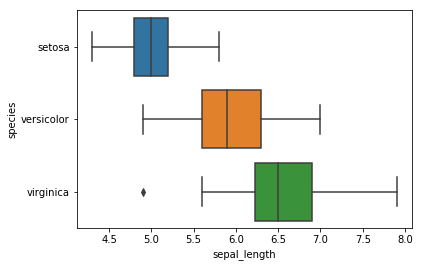

In [98]:
sns.boxplot("sepal_length", "species", data=iris)

In [99]:
# help(np.var) ---> ddof=0

1. Write a function which standardizes the values in a given
numeric vector, i.e., rescales its elements so that the resulting vector
is of mean and standard deviation of 1.
Note: this is also called "Z-score computing".

2. Write a function which standardizes the values in each column of
a given matrix (separately).

In [100]:
A = np.array(iris.iloc[:10, 0:4]) # first 10 rows, 4 columns of iris
A

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [101]:
def standardize(x):
    return (x-np.mean(x))/np.std(x, ddof=1)

standardize(A[:,0])

array([ 0.82373177,  0.13728863, -0.54915451, -0.89237609,  0.4805102 ,
        1.85339649, -0.89237609,  0.4805102 , -1.57881923,  0.13728863])

In [102]:
np.abs(standardize(A[:,0]).mean()-0.0)<1e-9, np.abs(standardize(A[:,0]).std(ddof=1)-1.0)<1e-9

(True, True)

In [103]:
#np.apply_along_axis(standardize, 0, A)
(A-np.mean(A, axis=0))/np.std(A, axis=0)

array([[ 0.86828953,  0.65207831, -0.48795004, -0.26726124],
       [ 0.14471492, -1.06391725, -0.48795004, -0.26726124],
       [-0.57885968, -0.37751902, -1.46385011, -0.26726124],
       [-0.94064699, -0.72071813,  0.48795004, -0.26726124],
       [ 0.50650222,  0.99527742, -0.48795004, -0.26726124],
       [ 1.95365143,  2.02487476,  2.43975018,  2.40535118],
       [-0.94064699,  0.3088792 , -0.48795004,  1.06904497],
       [ 0.50650222,  0.3088792 ,  0.48795004, -0.26726124],
       [-1.66422159, -1.40711636, -0.48795004, -0.26726124],
       [ 0.14471492, -0.72071813,  0.48795004, -1.60356745]])

1. Let `x` and `y` be two vectors of the same length, $n$.
Compute [the Pearson linear correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient),
given by:
$$
r(\mathbf{x},\mathbf{y}) =  \frac{1}{n-1} \sum_{i=1}^n
   \frac{x_i - \bar{x}}{s_{x}}
\,
   \frac{y_i - \bar{y}}{s_{y}}.
$$


2. Let `x` and `y` be two vectors of the same length, $n$.
Compute [the Spearman rank correlation coefficient](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient),
given by:
$$
\varrho(\mathbf{x},\mathbf{y})
=
1-\frac{6 \sum_{i=1}^n d_i^2}{n (n^2-1)},
$$
where $d_i=R(\mathbf{x})_i-R(\mathbf{y})_i$, $i=1,\dots,n$,
and $R(\mathbf{x})_i$ denotes the rank of $x_i$ in `x`.

3. Given a matrix with $n$ rows and $m$ columns (e.g., the first 4 rows
from the `iris` dataset), compute the correlation matrix, i.e.,
an $m\times m$ matrix $\mathbf{C}$ with $c_{i,j}$ denoting
the Pearson coefficient for the $i$-th and the $j$-th column.

In [104]:
def pearson(x,y):
    return np.sum(
        (x-np.mean(x))/np.std(x, ddof=1) * (y-np.mean(y))/np.std(y, ddof=1)
    ) / (len(x)-1)

pearson(A[:,0], A[:,1])

0.7872066124624176

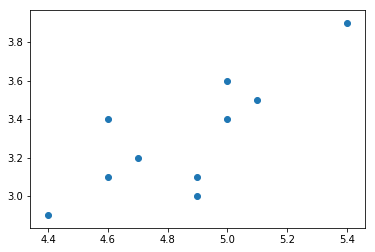

In [105]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(A[:,0], A[:,1])